In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import nltk
import numpy as np
import random
import math
import textwrap
import jsonlines
from scipy.stats import pearsonr, spearmanr, kendalltau
from tabulate import tabulate
plt.rcParams['font.family'] = "sans-serif"

# 参考链接：https://zhuanlan.zhihu.com/p/93423829

### 1. Lineplot

#### 1.1 Example

In [3]:
x = np.log(np.arange(1024, 16384+1, 1024)) # x-axis is log-scale
x2 = np.log(np.array([1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072]))
x3 = np.log(np.array([1024, 2048, 3072, 4096, 4352, 4608, 4864, 5120, 5376, 5632, 5888, 6144]))

llama_linear = np.array([5.30, 5.09, 4.98, 4.92, 4.88, 4.84, 4.84, 4.84, 4.83, 4.82, 4.80, 4.78, 4.79, 4.78, 4.79, 4.82])
llama_ntk = np.array([5.21, 5.01, 4.90, 4.84, 4.80, 4.76, 4.76, 4.77, 4.77, 4.77, 4.80, 4.83, 4.94, 5.06, 5.22, 5.46])
llama_yarn = np.array([5.19, 5.00, 4.89, 4.83, 4.80, 4.77, 4.77, 4.77, 4.76, 4.75, 4.74, 4.72, 4.74, 4.73, 4.74, 4.76])
llama_vanilla = np.array([5.20, 5.13, 5.08, 5.04, 4.98, 5.14, 7.85, 13.6, 22.5])


llama2_linear = np.array([5.13, 4.92, 4.80, 4.74, 4.70, 4.66, 4.65, 4.65, 4.64, 4.62, 4.61, 4.59, 4.59, 4.58, 4.59, 4.59])
llama2_ntk = np.array([5.09, 4.88, 4.76, 4.70, 4.67, 4.63, 4.62, 4.62, 4.61, 4.60, 4.59, 4.57, 4.60, 4.63, 4.72, 4.93])
llama2_yarn = np.array([5.08, 4.88, 4.77, 4.71, 4.67, 4.63, 4.63, 4.63, 4.62, 4.60, 4.59, 4.57, 4.58, 4.57, 4.58, 4.60])
llama2_vanilla = np.array([5.08, 4.86, 4.75, 4.69, 4.98, 5.91, 7.36, 10.0, 13.5, 17.6, 22.3, 27.4])


gptj_linear = np.array([9.12, 8.60, 8.32, 8.16, 8.08, 8.06, 8.02, 7.98, 7.94, 7.89, 7.90, 7.88, 7.85, 7.84, 7.84, 7.83])
gptj_ntk = np.array([8.77, 8.29, 8.03, 7.88, 7.81, 7.80, 7.77, 7.74, 7.71, 7.69, 7.73, 7.77, 7.81, 7.91, 8.06, 8.32])
gptj_yarn = np.array([8.82, 8.33, 8.08, 7.93, 7.87, 7.88, 7.85, 7.83, 7.80, 7.77, 7.79, 7.79, 7.76, 7.77, 7.78, 7.84])
gptj_vanilla = np.array([8.68, 8.52, 8.42, 8.32, 8.20, 8.51, 10.9, 14.6, 19.7
])


<Figure size 640x480 with 0 Axes>

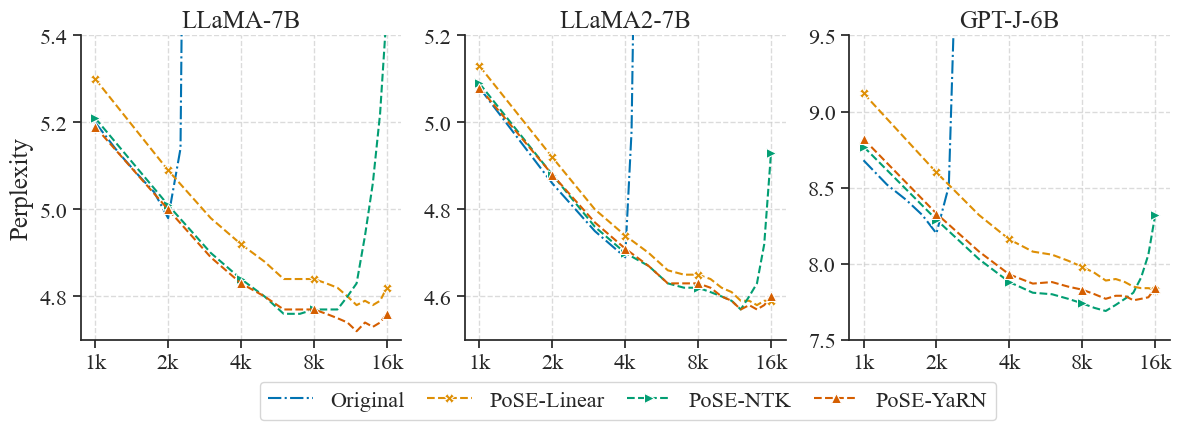

In [4]:
sns.set(style='ticks', font='Times New Roman', context='notebook')
sns.set_palette(sns.color_palette("colorblind"))
plt.figure()
fig, ax = plt.subplots(1,3,figsize=(12,4))

# subplot 1
sns.lineplot(ax=ax[0], x=x2, y=llama_vanilla, label="Original", linewidth=1.5, linestyle='-.')
sns.lineplot(ax=ax[0], x=x, y=llama_linear, label="PoSE-Linear", linewidth=1.5, linestyle='--', marker="X", markersize=7, markevery=[0,1,3,7,15]) # markevery allows drawing marker at a subset of datapoints
sns.lineplot(ax=ax[0], x=x, y=llama_ntk, label="PoSE-NTK", linewidth=1.5, linestyle='--',marker=">", markersize=7, markevery=[0,1,3,7,15])
sns.lineplot(ax=ax[0], x=x, y=llama_yarn, label="PoSE-YaRN", linewidth=1.5, linestyle='--',marker="^", markersize=7, markevery=[0,1,3,7,15])

ax[0].set_ylabel("Perplexity",fontsize=18)
# ax[0].set_xlabel("",fontsize=18)
ax[0].set_title("LLaMA-7B", fontsize=18)
xticks = x[[0,1,3,7,15]]
xticks_labels = ["1k", "2k", "4k", "8k", "16k"]
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticks_labels, fontsize=16)
ax[0].set_ylim(4.7, 5.4) # range of y-axis
ax[0].tick_params(axis='y', labelsize=16) # set y-axis label size
ax[0].legend(loc='upper right',fontsize=12, ncol=1).remove() # remove legend
ax[0].grid(True, linestyle='--', alpha=0.7) # add grid line to plot

# subplot 2
sns.lineplot(ax=ax[1], x=x3, y=llama2_vanilla, label="Original", linewidth=1.5, linestyle='-.')
sns.lineplot(ax=ax[1], x=x, y=llama2_linear, label="PoSE-Linear", linewidth=1.5, linestyle='--', marker="X", markersize=7, markevery=[0,1,3,7,15])
sns.lineplot(ax=ax[1], x=x, y=llama2_ntk, label="PoSE-NTK", linewidth=1.5, linestyle='--',marker=">", markersize=7, markevery=[0,1,3,7,15])
sns.lineplot(ax=ax[1], x=x, y=llama2_yarn, label="PoSE-YaRN", linewidth=1.5, linestyle='--',marker="^", markersize=7, markevery=[0,1,3,7,15])

ax[1].set_title("LLaMA2-7B", fontsize=18)
xticks = x[[0,1,3,7,15]]
xticks_labels = ["1k", "2k", "4k", "8k", "16k"]
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticks_labels, fontsize=16)
ax[1].set_ylim(4.5, 5.2)
ax[1].tick_params(axis='y', labelsize=16)
legend=ax[1].legend(loc='upper right',fontsize=12, ncol=1)
legend.remove()
ax[1].grid(True, linestyle='--', alpha=0.7)

# subplot 3
sns.lineplot(ax=ax[2], x=x2, y=gptj_vanilla, label="Original", linewidth=1.5, linestyle='-.')
sns.lineplot(ax=ax[2], x=x, y=gptj_linear, label="PoSE-Linear", linewidth=1.5, linestyle='--', marker="X", markersize=7, markevery=[0,1,3,7,15])
sns.lineplot(ax=ax[2], x=x, y=gptj_ntk, label="PoSE-NTK", linewidth=1.5, linestyle='--',marker=">", markersize=7, markevery=[0,1,3,7,15])
sns.lineplot(ax=ax[2], x=x, y=gptj_yarn, label="PoSE-YaRN", linewidth=1.5, linestyle='--',marker="^", markersize=7, markevery=[0,1,3,7,15])

ax[2].set_title("GPT-J-6B", fontsize=18)
xticks = x[[0,1,3,7,15]]
xticks_labels = ["1k", "2k", "4k", "8k", "16k"]
ax[2].set_xticks(xticks)
ax[2].set_xticklabels(xticks_labels, fontsize=16)
yticks = [7.5, 8.0, 8.5, 9.0, 9.5]
ax[2].set_yticks(yticks)
ax[2].set_yticklabels(yticks, fontsize=16)
ax[2].set_ylim(7.5, 9.5)
ax[2].legend(loc='upper right',fontsize=14, ncol=1).remove()
ax[2].grid(True, linestyle='--', alpha=0.7)

# move legend out of each subplot, place it at the bottom of the figure
labels = [t.get_text().replace('\n', ' ') for t in legend.get_texts()]
legend = fig.legend(legend.get_lines(), labels, loc='lower center', ncol=4,bbox_to_anchor=(0.53, -0.1),columnspacing=1,fontsize=16)
sns.despine() # remove the upper and right spines of each subplot

plt.tight_layout()
plt.savefig("efficacy.pdf",bbox_inches='tight')
plt.show()

### 1.2 Example

<Figure size 640x480 with 0 Axes>

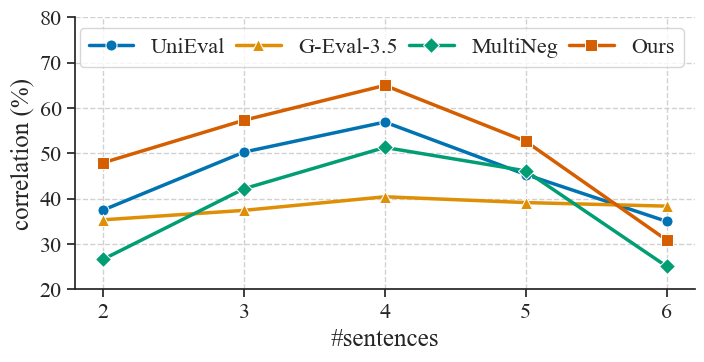

In [13]:
x = [2,3,4,5,6]
unieval = [37.46679946589498, 50.25944536935053, 56.87632389985696, 45.30773147330498, 34.96657994713719]
chatgpt = [35.31441795329959, 37.40165566059502, 40.401429177948245, 39.117825583280336, 38.33250100085947]
multineg = [26.601913340754717, 42.17123928533103, 51.285001125064575, 46.110418302681914, 25.04570297017013]
ours = [47.90319255658225, 57.2832228214499, 64.97055423962387, 52.616186196330894, 30.847258223286424]

df = pd.DataFrame({'x': x, 'unieval':unieval, 'chatgpt':chatgpt, 'multineg':multineg, 'ours':ours})

sns.set(style='ticks', palette='colorblind', font='Times New Roman', context='notebook')
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(8,4))

sns.lineplot(data=df, x="x", y="unieval", label="UniEval", marker='o', linewidth=2.5, markersize=8)
sns.lineplot(data=df, x="x", y="chatgpt", label="G-Eval-3.5", marker='^', linewidth=2.5, markersize=8)
sns.lineplot(data=df, x="x", y="multineg", label="MultiNeg", marker='D', linewidth=2.5, markersize=8)
sns.lineplot(data=df, x="x", y="ours", label="Ours", marker='s', linewidth=2.5, markersize=8)

ax.set_xlabel("#sentences", fontsize=18)
ax.set_ylabel("correlation (%)", fontsize=18)
ax.legend(fontsize=16, loc='upper right', ncol=4, columnspacing=0.5)

xticks = [2,3,4,5,6]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=16)
yticks = [20, 30, 40, 50, 60, 70, 80]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=16)
ax.grid(True, linestyle='--', alpha=0.9)

sns.despine()


plt.subplots_adjust(bottom=0.2)

### 2. Barplot

#### 2.1 Example

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

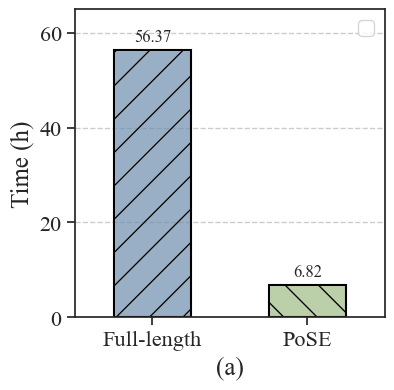

In [16]:
x = ["Full-length", "PoSE"]
time = np.array([56 + 22/60, 6 + 49/60])

df = pd.DataFrame({'Method': x, 'Time': time})

sns.set(style='ticks', font='Times New Roman', context='notebook')
sns.set_palette(["#638EB9","#9EC57B"], desat=1.0) # specify color palette
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(4,4))

sns.barplot(x='Method', y='Time', data=df, width=0.5, alpha=0.7) # alpha controls the transparency of the bars

for i, p in enumerate(ax.patches): 
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    # add value labels to each bar
    ax.annotate(format(height, '.2f'),
                (x + width / 2., height),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points')
    # add rectangle frame to each bar
    ax.add_patch(plt.Rectangle((x, y), width, height, fill=False, edgecolor='black', linewidth=1.5))

hatches = ['/', '\\']  # specify different hatches ('/' and '\') for each bar
for i, p in enumerate(ax.patches):
    hatch = hatches[i % len(hatches)]
    p.set_hatch(hatch)

ax.set(ylim=(0, 65))
ax.legend(fontsize=15, ncol=3).set_title('')
ax.set_xlabel("(a)", fontsize=18)
ax.set_ylabel("Time (h)", fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid(axis='y', linestyle='--')

plt.savefig("time_plot.pdf", bbox_inches='tight')
plt.show()

#### 2.2 Example

<Figure size 640x480 with 0 Axes>

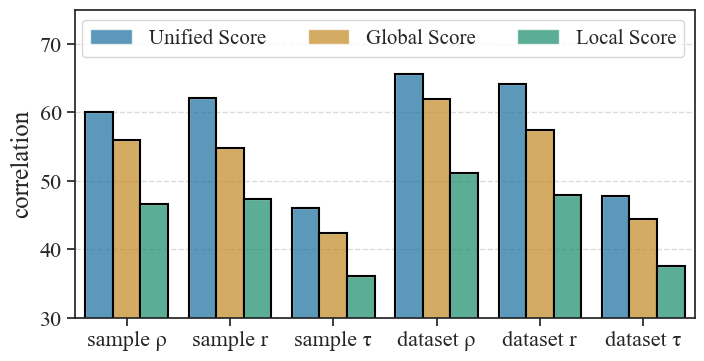

In [31]:
x = ["sample ρ", "sample r", "sample τ", "dataset ρ", "dataset r", "dataset τ"]
unified_score = np.array([0.600, 0.621, 0.460, 0.656, 0.642, 0.478]) * 100
global_score = np.array([0.560, 0.548, 0.424, 0.619, 0.574, 0.444]) * 100
local_score = np.array([0.466, 0.474, 0.361, 0.512, 0.480, 0.375]) * 100

df = pd.DataFrame({'Method': x, 'Unified Score': unified_score, 'Global Score': global_score, 'Local Score': local_score})
df_melted = df.melt('Method', var_name='Comparison', value_name='Value')

sns.set(style='ticks', palette='colorblind', font='Times New Roman', context='notebook')
plt.figure()
fig, ax = plt.subplots(1,1,figsize=(8,4))

sns.barplot(x='Method', y='Value', hue='Comparison', data=df_melted, alpha=0.7)

for i, p in enumerate(ax.patches): 
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    # add value labels to each bar
    # add rectangle frame to each bar
    ax.add_patch(plt.Rectangle((x, y), width, height, fill=False, edgecolor='black', linewidth=1.5))


ax.set(ylim=(30, 75))
ax.legend(fontsize=15, ncol=3).set_title('')
# Add labels and title
ax.set_xlabel('')
ax.set_ylabel('correlation', fontsize=18)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.savefig("ablation_scoring.pdf")
plt.show()


### 3. Advanced Scenarios

#### 3.1 Two Subplots with Adjustable Width Ratio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

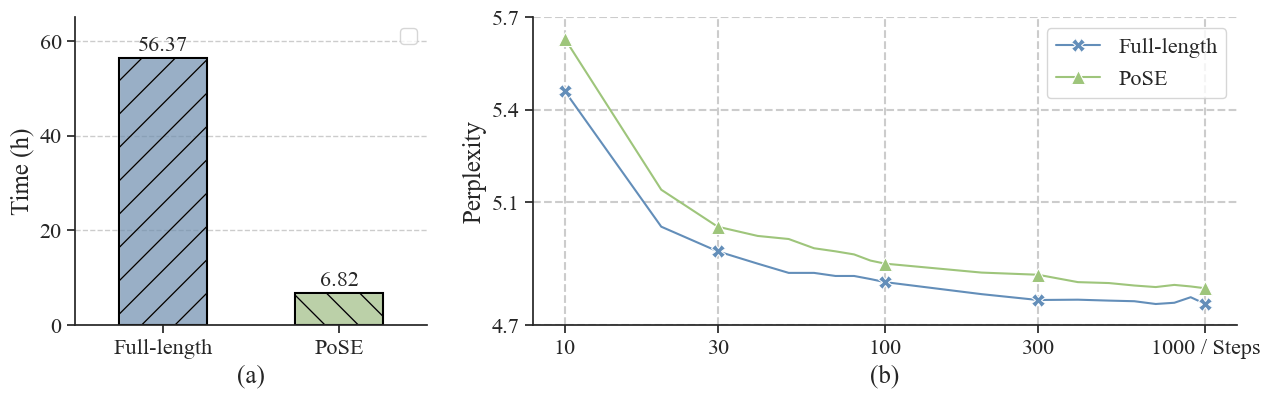

In [17]:
sns.set(style='ticks', font='Times New Roman', context='notebook')
sns.set_palette(["#638EB9","#9EC57B"], desat=1.0)
plt.figure()
fig, ax = plt.subplots(1,2,figsize=(15,4), gridspec_kw={'width_ratios': [1, 2]}) # set the ratio between the two subplots

time_df = pd.DataFrame({'Method': ["Full-length", "PoSE"], 'Time': np.array([56 + 22/60, 6 + 49/60])})

# subplot 1
sns.barplot(ax=ax[0], x='Method', y='Time', data=time_df, width=0.5, alpha=0.7)

for i, p in enumerate(ax[0].patches):
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax[0].annotate(format(height, '.2f'),
                (x + width / 2., height),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontsize=16)
    ax[0].add_patch(plt.Rectangle((x, y), width, height, fill=False, edgecolor='black', linewidth=1.5))

hatches = ['/', '\\']  # specify different hatches ('/' and '\') for each bar
for i, p in enumerate(ax[0].patches):
    hatch = hatches[i % len(hatches)]
    p.set_hatch(hatch)

ax[0].set(ylim=(0, 65))
ax[0].legend(fontsize=15, ncol=3).set_title('')
# Add labels and title

ax[0].set_xlabel("(a)", fontsize=18)
ax[0].set_ylabel("Time (h)", fontsize=18)
ax[0].tick_params(axis='x', labelsize=16)
ax[0].tick_params(axis='y', labelsize=16)
ax[0].grid(axis='y', linestyle='--')

# subplot 2
x = np.log(np.array([10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000]))
poskip=[5.63,5.14,5.02,4.99,4.98,4.95,4.94,4.93,4.91,4.9,4.871,4.864,4.84,4.837,4.829,4.824,4.831,4.826,4.82]

full=[5.46,5.02,4.94,4.9,4.87,4.87,4.86,4.86,4.85,4.84,4.801,4.782,4.783,4.78,4.778,4.769,4.773,4.791,4.769]
# poskip=[4.908, 4.871, 4.864, 4.84, 4.837, 4.829, 4.824, 4.831, 4.826, 4.82]


df = pd.DataFrame({'x': x, 'full': full, 'poskip': poskip})


sns.lineplot(ax=ax[1], data=df, x="x", y="full", label="Full-length", marker='X', linewidth=1.5, linestyle='-', markersize=10, markevery=[0,2,9,11,18])
sns.lineplot(ax=ax[1], data=df, x="x", y="poskip", label="PoSE", marker='^',linewidth=1.5, linestyle='-', markersize=10, markevery=[0,2,9,11,18])

ax[1].set_xlabel("(b)", fontsize=18)
ax[1].set_ylabel("Perplexity", fontsize=18)
ax[1].legend(fontsize=16, loc='upper right', ncol=1, columnspacing=0.5)

# xticks = [10,50,100,140,190]
xticks = x[[0,2,9,11,18]]
xticks_labels = [10,30,100,300,"1000 / Steps"]
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticks_labels, fontsize=16)
yticks = [4.7, 5.1, 5.4, 5.7]
ax[1].set_yticks(yticks)
ax[1].set_yticklabels(yticks, fontsize=16)
ax[1].grid(True, linestyle='--', linewidth=1.5)

sns.despine()
# plt.yticks([30, 40, 50, 60], size=16)
# Show the plot
plt.savefig("efficiency.pdf",bbox_inches='tight')
plt.show()